# Bioinformatics Lab class assignment 11/09/2020

# Assignment-7

# Problem 1. Construct 10 "nt" random sequences each of size 20.

In [13]:
import numpy as np
from Bio import Align
import random
from Bio import SeqIO

In [14]:
def seq(n):
    lst = list(["A","T","G","C"]) 
    String= "".join(random.choice(lst) for i in range(n))
    return String
list_seq=[]
list_name=[]
for i in range(10):
    list_seq.append(seq(20))
    list_name.append('seq'+str(i+1))

In [15]:
dic=dict(zip(list_name,list_seq))
dic

ofile = open('my_sequences.fasta', "w")
for i in range(len(list_seq)):
    ofile.write(">" + list_name[i] + "\n" +list_seq[i] + "\n")
ofile.close()

for seq_record in SeqIO.parse('my_sequences.fasta', "fasta"):
    print(repr(seq_record.seq))

Seq('ACATGGTGACTGACATGCGG', SingleLetterAlphabet())
Seq('TGGAGGAATAAAAGTACGTC', SingleLetterAlphabet())
Seq('CTAAAATGCAACGACTGCAT', SingleLetterAlphabet())
Seq('TAATGTTACTACACCGTGTT', SingleLetterAlphabet())
Seq('CCTCGGGAGCCCTCGTACTA', SingleLetterAlphabet())
Seq('CGCGTATGTCCTGCCTTGAC', SingleLetterAlphabet())
Seq('CATTAGTTAAGGACGCAGTA', SingleLetterAlphabet())
Seq('GATGCCAATTAGGTTGCTCC', SingleLetterAlphabet())
Seq('TTTTGGACGGTAAGCAGGCG', SingleLetterAlphabet())
Seq('TTTCTCTCAGGGGCGCCGGC', SingleLetterAlphabet())


# Problem-2.  align these sequences using the program ClustalW

In [16]:
import os
from Bio.Align.Applications import ClustalwCommandline

#download exe from http://clustal.org/download/current/
clustalw_exe = "/home/ritesh/Documents/Bioinformatics/Biopython/clustalw2"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile='my_sequences.fasta')
print(clustalw_cline)

/home/ritesh/Documents/Bioinformatics/Biopython/clustalw2 -infile=my_sequences.fasta


In [17]:
import os
assert os.path.isfile(clustalw_exe), "Clustal W executable missing"
stdout, stderr = clustalw_cline()

In [18]:
from Bio import AlignIO
align = AlignIO.read("my_sequences.aln", "clustal")
print(align)

SingleLetterAlphabet() alignment with 10 rows and 27 columns
-CTAAAATGCAACGACTGCAT------ seq3
----TAATGTTACTACACCGTGTT--- seq4
---ACATGGTGACTGACATGCGG---- seq1
-------CCTCGGGAGCCCTCGTACTA seq5
---TTTCTCTCAGGGGCGCCGGC---- seq10
---CATTAGTTAAGGACGC-AGTA--- seq7
-----GATGCCAATTAGGTTGCTCC-- seq8
TTTTGGACGGTAAGCAGGCG------- seq9
----TGGAGGAATAAAAGTACGTC--- seq2
-----CGCGTATGTCCTGCCTTGAC-- seq6


# Problem-3. write a code for UPGMA to construct a phylogenetic tree (newwick format) using the clustalW outcome.

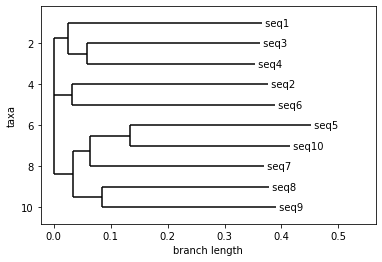

In [19]:
from Bio import Phylo
tree = Phylo.read("my_sequences.dnd", "newick")
tree.rooted=True
Phylo.draw(tree)